<a href="https://colab.research.google.com/github/un21988/CE888-7/blob/main/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [2]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [3]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [4]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
	
    mean_array = []
    
    for i in range(n_bootstraps):
        sample_array = np.array(np.random.choice(x, size = sample_size))
        mean = sample_array.mean()
        print(sample_array, mean)
        
        mean_array.append(mean)
        
    print(mean_array)
    
    mean_array = np.sort(mean_array)
    print("sorted mean array : ")
    print(mean_array)
    
    data_mean = mean_array.mean()
   # print("Data_mean = ", data_mean)
    print("2.5 % value of sample array = ", round(np.percentile(mean_array, 2.5),1))
    print("97.5 % value of sample array = ", round(np.percentile(mean_array, 97.5),1))
    
     
    lower_bound = round(np.percentile(mean_array, 2.5),1)
    upper_bound = round(np.percentile(mean_array, 97.5),1)
    mean_array = mean_array[ (mean_array >= lower_bound) & (mean_array <= upper_bound) ]
   # print(mean_array > lower_bound)
    print("Final mean array :  \n", mean_array)
    #print(mean_array > lower_bound)
    lower = mean_array[0]
    upper = mean_array[len(mean_array)-1]
    
    return data_mean, lower, upper

Streaming output truncated to the last 5000 lines.
[20.  2.  5. 13. 13. 10.  5. 13. 13.  8. 22.  8. 22. 13.] 11.928571428571429
[10. 13.  9.  2. 20.  8. 13.  8. 20.  9. 20.  4.  2. 10.] 10.571428571428571
[ 2. 22.  2.  8.  9. 20.  9.  2. 13.  2.  8.  4.  5.  2.] 7.714285714285714
[ 7. 13.  9.  7. 22.  8.  8.  2.  9.  2.  9.  7.  9. 20.] 9.428571428571429
[22.  2.  4.  7. 10. 22.  7.  8.  5.  8. 10.  2.  9.  8.] 8.857142857142858
[ 8. 22.  5.  8. 22.  4. 10. 10. 13. 10.  7.  2. 10.  9.] 10.0
[20.  8.  9. 10. 10.  8.  8. 10. 10. 10. 10.  9. 22. 10.] 11.0
[20.  9.  8.  2.  2.  9.  4.  2. 10.  8. 13. 22. 22.  2.] 9.5
[ 9.  2.  8.  7.  8. 10.  4.  2. 13. 22. 22. 13. 10.  7.] 9.785714285714286
[ 9.  5. 20.  9. 13.  2.  4.  7.  8.  7. 10. 13.  9. 13.] 9.214285714285714
[ 7.  4. 22.  9.  4. 13. 13.  7.  9.  7.  4.  2.  7.  5.] 8.071428571428571
[ 9.  9.  8.  9.  9. 10. 10.  2.  5.  4.  5.  5. 20.  9.] 8.142857142857142
[13.  9.  2.  7.  2.  8.  4. 10.  5. 10. 10.  4.  8. 20.] 8.0
[10.  8. 20. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

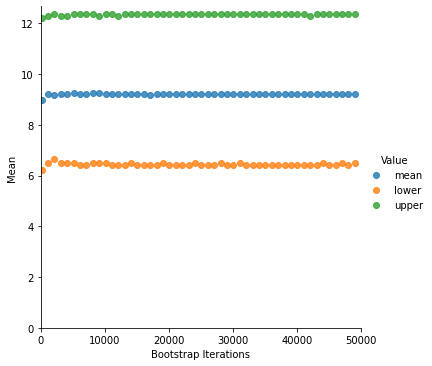

In [5]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [59]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
  
  array_list = []
  mean = []
  for i in range(n_bootstraps):
    array_list.append(np.random.choice(sample, sample_size, True))
  
  for j in array_list:
    mean.append(np.mean(j))
  
  
  mean.sort()
  data_mean = np.mean(mean)
  #print(data_mean)
     
  lower = np.percentile(mean, (100-ci)/2)
  upper = np.percentile(mean, 100-((100-ci)/2))
    
  return data_mean, lower, upper

8.992142857142857
9.224285714285715
9.172448979591836
9.18963133640553
9.195487804878049
9.174131652661064
9.19231850117096
9.21778672032193
9.214920634920635
9.249270015698587
9.204384724186705
9.22118404118404
9.232851239669422
9.18593784078517
9.207664640324214
9.212223273415326
9.224321206743566
9.2028111946533
9.211239147592739
9.21326851159312
9.211140724946695
9.203893026404874
9.213458306399483
9.21838899196042
9.225195613515115
9.224513375071146
9.202698412698412
9.225864522930943
9.234567869852565
9.216885125184096
9.216824869482675
9.195050528249885
9.210053404539387
9.210140267587397
9.213682446585674
9.2153256003256
9.220003957261575
9.223093954562957
9.223421447319083
9.207517354767992
9.206870324189525
9.213168230795967
9.209930437733288
9.220159098442162
9.218219954648527
9.218289515362686
9.220134800123954
9.2170821959357
9.216156816156817
9.212695664823974


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

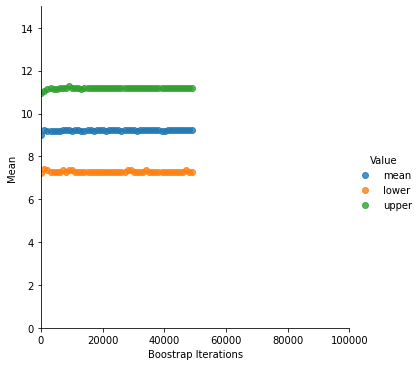

In [55]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,15)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [56]:
import pandas as pd
import numpy as np


df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
df

,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0
...,...,...
244,27,NaN
245,27,NaN
246,32,NaN
247,28,NaN


In [60]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->


currentfleet = df.values.T[0][np.logical_not(np.isnan(df.values.T[0]))]
print(currentfleet)
for i in range(0,len(currentfleet)):
  print(currentfleet[i])
  if i == 10:
    break
newfleet = df.values.T[1][np.logical_not(np.isnan(df.values.T[1]))]
print(currentfleet)
print(newfleet)
# Note: you can add more cells as needed to organise your code and your plots


[18. 15. 18. 16. 17. 15. 14. 14. 14. 15. 15. 14. 15. 14. 22. 18. 21. 21.
 10. 10. 11.  9. 28. 25. 19. 16. 17. 19. 18. 14. 14. 14. 14. 12. 13. 13.
 18. 22. 19. 18. 23. 26. 25. 20. 21. 13. 14. 15. 14. 17. 11. 13. 12. 13.
 15. 13. 13. 14. 22. 28. 13. 14. 13. 14. 15. 12. 13. 13. 14. 13. 12. 13.
 18. 16. 18. 18. 23. 11. 12. 13. 12. 18. 21. 19. 21. 15. 16. 15. 11. 20.
 21. 19. 15. 26. 25. 16. 16. 18. 16. 13. 14. 14. 14. 28. 19. 18. 15. 15.
 16. 15. 16. 14. 17. 16. 15. 18. 21. 20. 13. 23. 20. 23. 18. 19. 25. 26.
 18. 16. 16. 15. 22. 22. 24. 23. 29. 25. 20. 18. 19. 18. 27. 13. 17. 13.
 13. 13. 30. 26. 18. 17. 16. 15. 18. 21. 19. 19. 16. 16. 16. 16. 25. 26.
 31. 34. 36. 20. 19. 20. 19. 21. 20. 25. 21. 19. 21. 21. 19. 18. 19. 18.
 18. 18. 30. 31. 23. 24. 22. 20. 22. 20. 21. 17. 18. 17. 18. 17. 16. 19.
 19. 36. 27. 23. 24. 34. 35. 28. 29. 27. 34. 32. 28. 26. 24. 19. 28. 24.
 27. 27. 26. 24. 30. 39. 35. 34. 30. 22. 27. 20. 18. 28. 27. 34. 31. 29.
 27. 24. 23. 38. 36. 25. 38. 26. 22. 36. 27. 27. 32

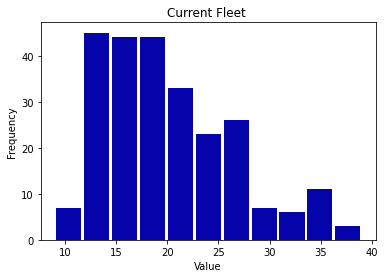

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
# plotting the histogram

plt.hist(currentfleet,bins='auto', color='#0504aa',
                             rwidth=0.90)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Current Fleet ')
plt.show()

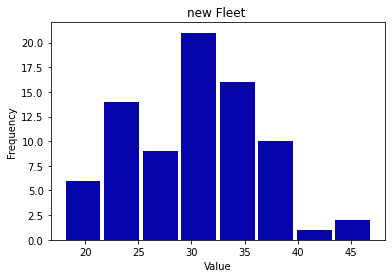

In [11]:
#ploting the hitogram 



plt.hist(newfleet,bins='auto', color='#0504aa',
                             rwidth=0.90)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('new Fleet ')
plt.show()

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

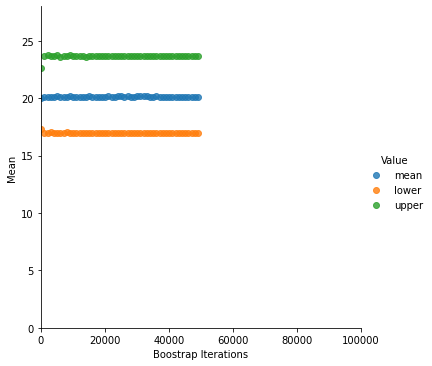

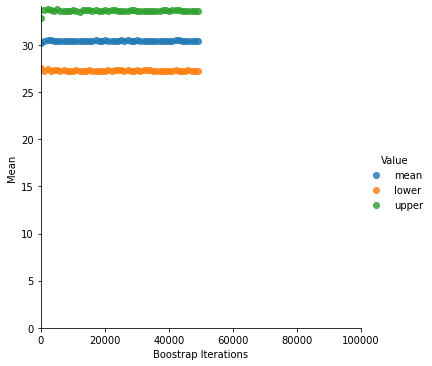

In [61]:
boot1=[]
for i in range(100, 50000, 1000):
    boots1 = bootstrap_mean_ci(currentfleet, data.shape[0], i, 95)
    boot1.append([i, boots1[0], "mean"])
    boot1.append([i, boots1[1], "lower"])
    boot1.append([i, boots1[2], "upper"])

df_boot1 = pd.DataFrame(boot1, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot1.columns[0], df_boot1.columns[1], data=df_boot1, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,28)
sns_plot.axes[0, 0].set_xlim(0, 100000)

boot2=[]
for i in range(100, 50000, 1000):
    boots = bootstrap_mean_ci(newfleet, data.shape[0], i, 95)
    boot2.append([i, boots[0], "mean"])
    boot2.append([i, boots[1], "lower"])
    boot2.append([i, boots[2], "upper"])

df_boot2 = pd.DataFrame(boot2, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot2.columns[0], df_boot2.columns[1], data=df_boot2, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)




In [62]:
# <---INSERT YOUR CODE HERE--->
def permut_test(sample1, sample2, n_permutations):
  sample1_mean= np.mean(sample1)
  sample2_mean= np.mean(sample2)
  t_obs = sample2_mean - sample1_mean

  concat_array = np.concatenate((sample1,sample2))
  score = 0

  for i in range(n_permutations):
    perm = np.random.permutation(concat_array)
    old_array = perm[: len(sample1)]
    new_array= perm[len(sample2) : len(perm)]

    old_mean = np.mean(old_array)

    new_mean = np.mean(new_array)

    t_perm = new_mean - old_mean

    if(t_perm > t_obs):
      score = score +1
  pvalue = score/n_permutations
  return pvalue

#print(permut_test(current_fleet , new_fleet_na, 30000))



In [68]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
#def permut_test(sample1, sample2, n_permutations):

  #Applying perm test function
print(permut_test(currentfleet,newfleet,30000))

print(bootstrap_mean_ci(data, data.shape[0], 10000, 95))

print(bootstrap_mean_ci(data, data.shape[0], 10000, 80))

print(bootstrap_mean_ci(currentfleet, data.shape[0], 10000, 80))  

0.0
(9.212892857142858, 6.428571428571429, 12.428571428571429)
(9.235028571428572, 7.357142857142856, 11.214285714285714)
(20.124521428571427, 18.0, 22.357142857142858)
